In [103]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [104]:
%matplotlib inline
plt.style.use('seaborn')

# JM 1 dataset 
 The resources for this dataset can be found at https://www.openml.org/d/1053
 Source: PROMISE Repository
 It consists of 22 attributes/features
 
  *Attribute Information:
  
1.  loc : numeric % McCabe’s line count of code
2.  v(g) : numeric % McCabe “cyclomatic complexity”
3.  ev(g) : numeric % McCabe “essential complexity”
4.  iv(g) : numeric % McCabe “design complexity”
5.  n : numeric % Halstead total operators + operands
6.  v : numeric % Halstead “volume”
7.  l : numeric % Halstead “program length”
8.  d : numeric % Halstead “difficulty”
9.  i : numeric % Halstead “intelligence”
10. e : numeric % Halstead “effort”
11. b : numeric % Halstead
12. t : numeric % Halstead’s time estimator
13. lOCode : numeric % Halstead’s line count
14. lOComment : numeric % Halstead’s count of lines of comments
15. lOBlank : numeric % Halstead’s count of blank lines
16. lOCodeAndComment: numeric
17. uniq_Op : numeric % unique operators
18. uniq_Opnd : numeric % unique operands
19. total_Op : numeric % total operators
20. total_Opnd : numeric % total operands
21: branchCount : numeric % of the flow graph
22. defects : {false,true} % module has/has not one or more reported defects

# Reading the data set

In [105]:
jm1 = pd.read_csv("JM1.csv")
jm1

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False


# our original dataset having 22 attributes and 10885 rows of data

In [106]:
print('Dataset Shape before drop_duplicate : ')
print( jm1.shape)

Dataset Shape before drop_duplicate : 
(10885, 22)


# preprocessing the dataset

In [107]:
# Droping the highly correlated attributes/features from the dataset(correlation analysis)

a= jm1.corr(method="spearman")
print(a)
def correlation(dataset, threshold):
    col_corr = set()#set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features =  correlation (a, 0.9)
s=jm1.drop(corr_features,axis=1)
s

                        loc      v(g)     ev(g)     iv(g)         n         v  \
loc                1.000000  0.808672  0.487406  0.746069  0.673119  0.674996   
v(g)               0.808672  1.000000  0.688867  0.832268  0.534250  0.538055   
ev(g)              0.487406  0.688867  1.000000  0.520918  0.283728  0.287015   
iv(g)              0.746069  0.832268  0.520918  1.000000  0.530629  0.536260   
n                  0.673119  0.534250  0.283728  0.530629  1.000000  0.999257   
v                  0.674996  0.538055  0.287015  0.536260  0.999257  1.000000   
l                 -0.725328 -0.709530 -0.495889 -0.574317 -0.282583 -0.279542   
d                  0.614088  0.570381  0.333189  0.509328  0.944368  0.941352   
i                  0.548448  0.338892  0.132378  0.427165  0.880604  0.886003   
e                  0.665855  0.563718  0.313413  0.536485  0.991103  0.990246   
b                  0.688044  0.549715  0.295101  0.545852  0.996755  0.997494   
t                  0.665851 

,loc,ev(g),n,l,lOComment,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.3,1.30,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.00,1,1,1,1,1,1,1,True
2,72.0,1.0,198.0,0.05,10,1,17,36,112,86,13,True
3,190.0,1.0,600.0,0.06,29,2,17,135,329,271,5,True
4,37.0,1.0,126.0,0.06,1,0,11,16,76,50,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,1.0,52.0,0.14,0,0,10,15,30,22,7,False
10881,9.0,1.0,30.0,0.12,0,0,12,8,19,11,3,False
10882,42.0,1.0,103.0,0.04,1,0,18,15,59,44,7,False
10883,10.0,1.0,36.0,0.12,0,0,9,8,21,15,1,False


In [108]:
print('Dataset Shape after dropping highly correlated features: ')
print(s.shape)

Dataset Shape after dropping highly correlated features: 
(10885, 12)


In [109]:
# total no of duplicates in the dataset after correlation analysis
 
s.duplicated().sum()

2111

In [110]:
#  delete the duplicate values from the datset

data=s.drop_duplicates()
print('Dataset Shape after drop_duplicate: ')
print(data.shape)

Dataset Shape after drop_duplicate: 
(8774, 12)


In [111]:
# After droping the unnecessary data we have 12 attriburtes and 8774 rows of data  

print(data.shape)
data

(8774, 12)


,loc,ev(g),n,l,lOComment,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.3,1.30,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.00,1,1,1,1,1,1,1,True
2,72.0,1.0,198.0,0.05,10,1,17,36,112,86,13,True
3,190.0,1.0,600.0,0.06,29,2,17,135,329,271,5,True
4,37.0,1.0,126.0,0.06,1,0,11,16,76,50,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,1.0,52.0,0.14,0,0,10,15,30,22,7,False
10881,9.0,1.0,30.0,0.12,0,0,12,8,19,11,3,False
10882,42.0,1.0,103.0,0.04,1,0,18,15,59,44,7,False
10883,10.0,1.0,36.0,0.12,0,0,9,8,21,15,1,False


## Overal structure of our dataset

In [112]:
jm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [113]:
jm1.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [114]:
jm1.tail()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False
10884,19.0,3.0,1.0,1.0,58.0,272.63,0.09,11.57,23.56,3154.67,...,13,0,2,1,12,14,31,27,5,False


In [115]:
jm1.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


In [116]:
jm1.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [117]:
# there is no missing values in the dataset jm1

In [118]:
jm1.groupby('defects').mean()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
defects,,,,,,,,,,,,,,,,
False,32.811038,5.018157,2.827361,3.189019,89.444048,494.157706,0.148302,12.622850,26.18903,18533.202788,0.164823,1029.622443,20.532976,2.027680,3.650871,0.260622
True,80.388414,11.894587,5.792498,7.388889,218.377493,1422.433770,0.081282,20.656804,42.98953,113134.306496,0.474644,6285.239672,50.093542,5.696581,8.688509,0.830009


In [119]:
jm1.isnull()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10881,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [120]:
jm1.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op               object
uniq_Opnd             object
total_Op              object
total_Opnd            object
branchCount           object
defects                 bool
dtype: object

In [121]:
# overall structure of dataset after cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8774 entries, 0 to 10884
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                8774 non-null   float64
 1   ev(g)              8774 non-null   float64
 2   n                  8774 non-null   float64
 3   l                  8774 non-null   float64
 4   lOComment          8774 non-null   int64  
 5   locCodeAndComment  8774 non-null   int64  
 6   uniq_Op            8774 non-null   object 
 7   uniq_Opnd          8774 non-null   object 
 8   total_Op           8774 non-null   object 
 9   total_Opnd         8774 non-null   object 
 10  branchCount        8774 non-null   object 
 11  defects            8774 non-null   bool   
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 831.1+ KB


In [122]:
y=data['defects']
y

0        False
1         True
2         True
3         True
4         True
         ...  
10880    False
10881    False
10882    False
10883    False
10884    False
Name: defects, Length: 8774, dtype: bool

In [123]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['defects']=le.fit_transform(data['defects'])

C:\Users\HYMA\AppData\Local\Temp\ipykernel_10964\594145682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['defects']=le.fit_transform(data['defects'])


In [124]:
y=data['defects'].value_counts()
y

0    6769
1    2005
Name: defects, dtype: int64

# Data Visualization

# Bivariate analysis

In [125]:
import seaborn as sns

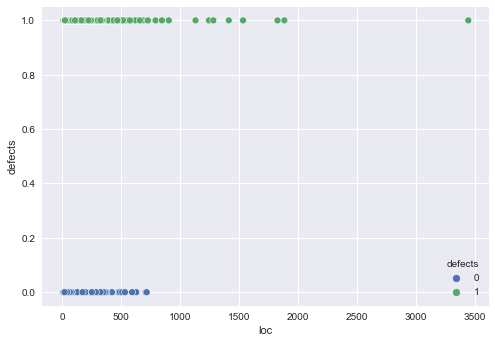

In [126]:
sns.scatterplot(x="loc" , y="defects" , data=data,hue=data['defects'])
plt.show()

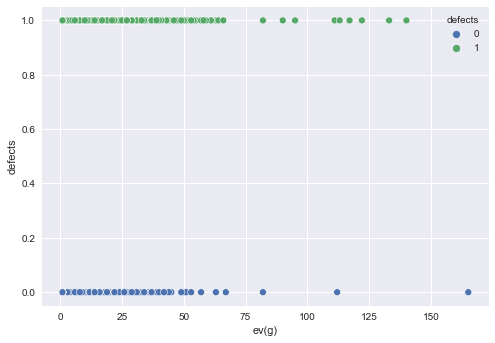

In [127]:
sns.scatterplot(x="ev(g)" , y="defects" , data=data,hue=data['defects'])
plt.show()

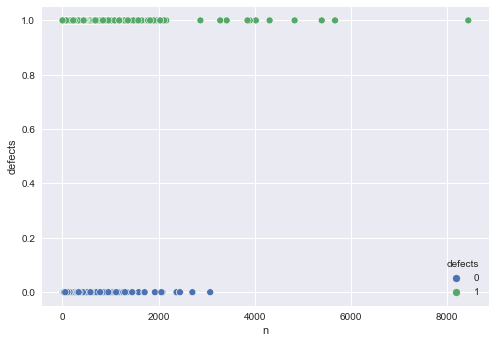

In [128]:
sns.scatterplot(x="n" , y="defects" , data=data,hue=data['defects'])
plt.show()

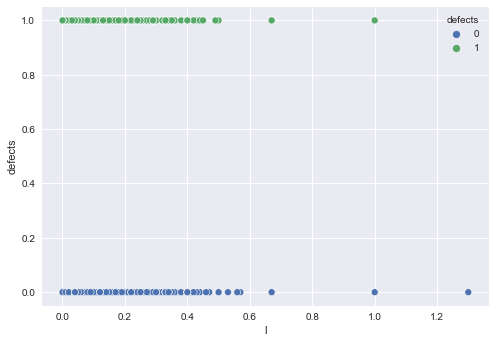

In [129]:
sns.scatterplot(x="l" , y="defects" , data=data,hue=data['defects'])
plt.show()

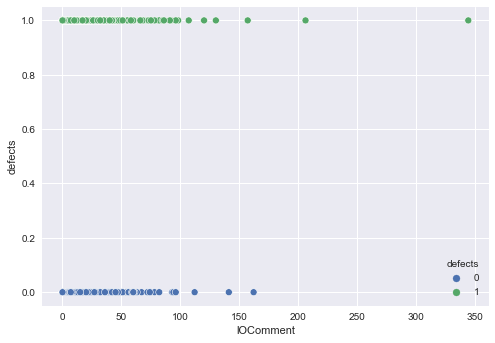

In [130]:
sns.scatterplot(x="lOComment" , y="defects" , data=data,hue=data['defects'])
plt.show()

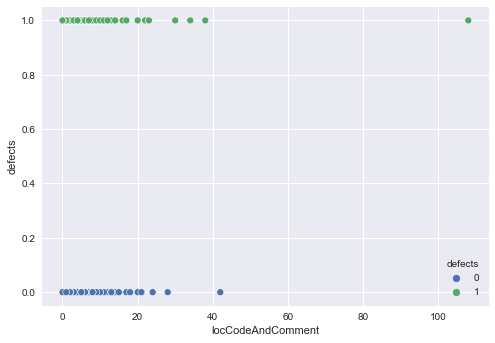

In [131]:
sns.scatterplot(x="locCodeAndComment" , y="defects" , data=data,hue=data['defects'])
plt.show()

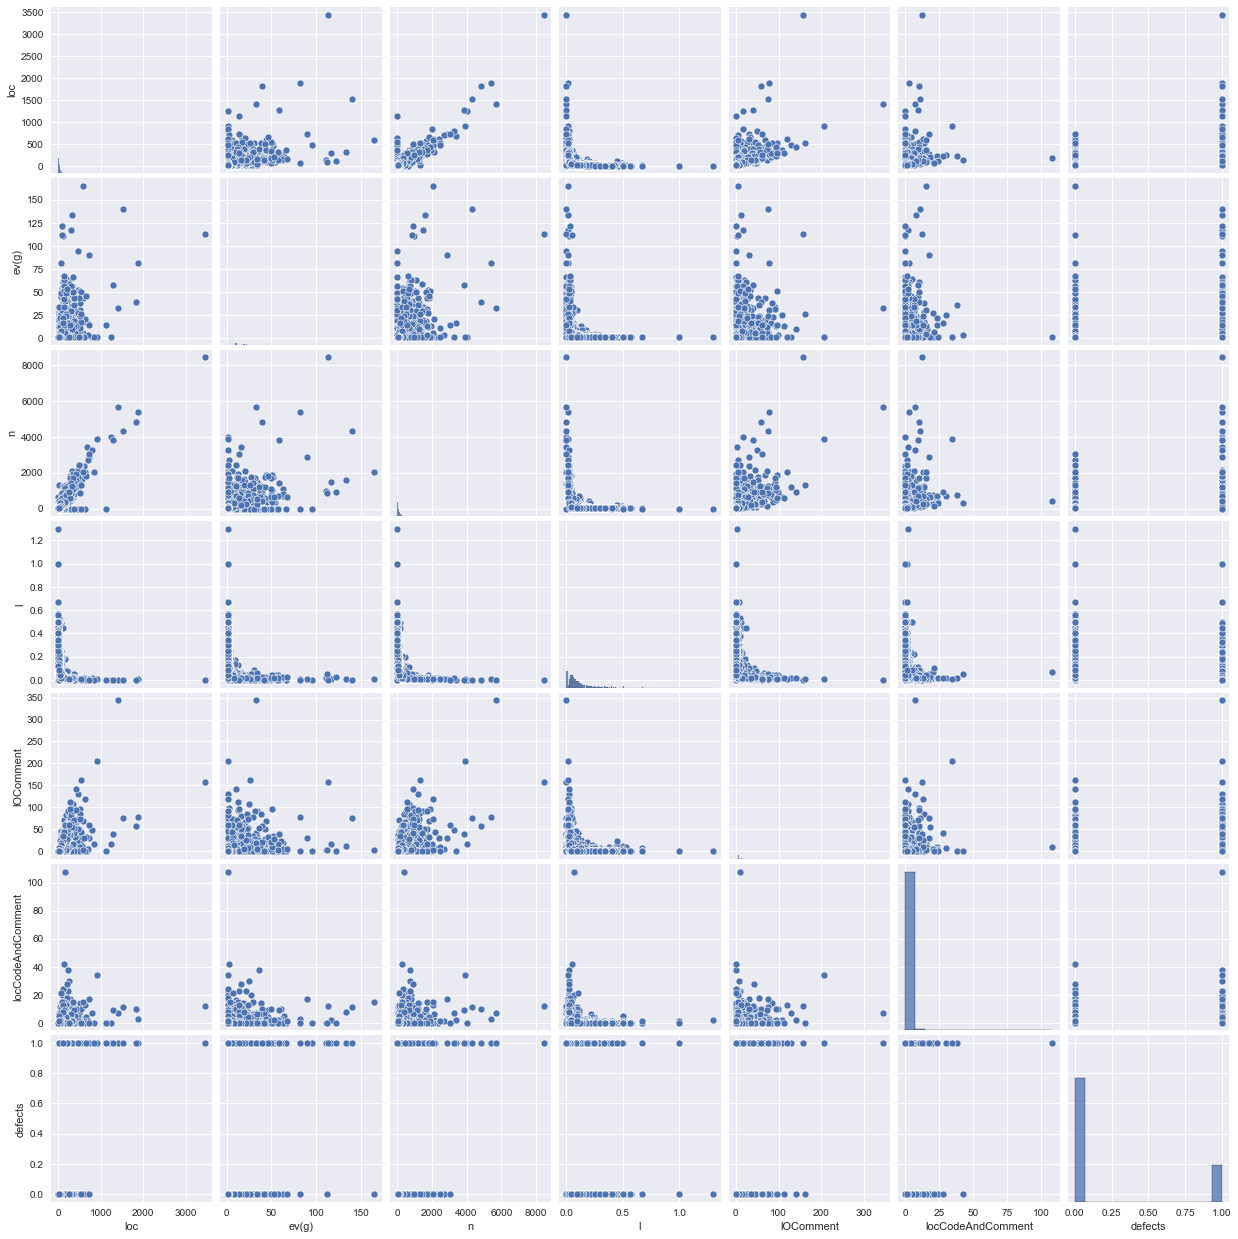

In [132]:
sns.pairplot(data)

# univariate analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='defects', ylabel='Density'>

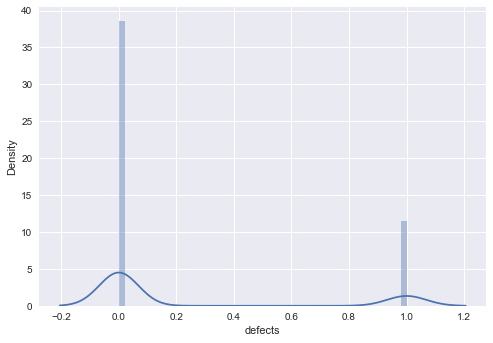

In [133]:
sns.distplot(data['defects'])

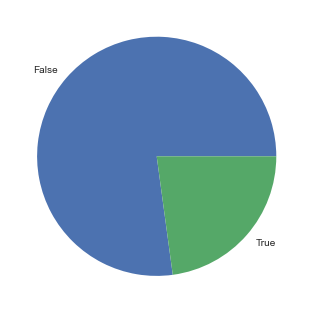

In [134]:
plt.pie(y,labels=('False','True'))
plt.show()

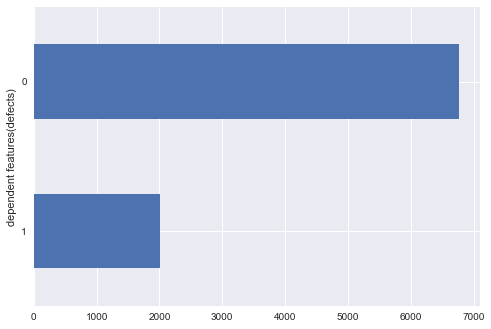

In [135]:
data.groupby([data['defects']]).size().sort_values(ascending=True).plot(kind='barh')
plt.ylabel('dependent features(defects)')
plt.show()

(array([8.693e+03, 6.700e+01, 6.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 3.4510e+02, 6.8920e+02, 1.0333e+03, 1.3774e+03,
        1.7215e+03, 2.0656e+03, 2.4097e+03, 2.7538e+03, 3.0979e+03,
        3.4420e+03]),
 <BarContainer object of 10 artists>)

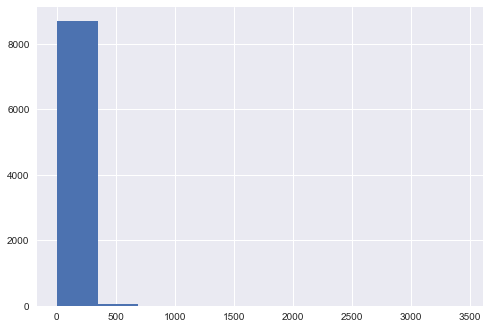

In [136]:
plt.hist(data['loc'])

(array([8.608e+03, 1.230e+02, 3.000e+01, 4.000e+00, 4.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  844.1, 1688.2, 2532.3, 3376.4, 4220.5, 5064.6, 5908.7,
        6752.8, 7596.9, 8441. ]),
 <BarContainer object of 10 artists>)

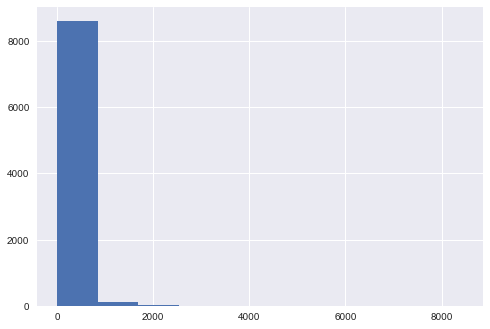

In [137]:
plt.hist(data['n'])

(array([6.580e+03, 1.545e+03, 3.850e+02, 2.160e+02, 5.000e+00, 4.000e+01,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([0.  , 0.13, 0.26, 0.39, 0.52, 0.65, 0.78, 0.91, 1.04, 1.17, 1.3 ]),
 <BarContainer object of 10 artists>)

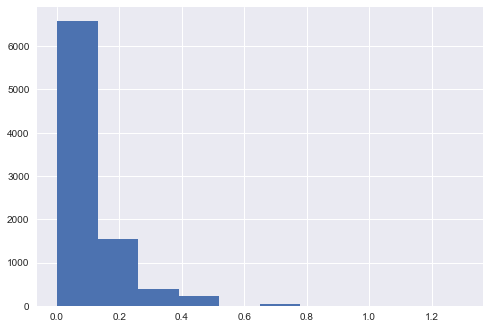

In [138]:
plt.hist(data['l'])

(array([3565., 2064., 1417.,  733.,  399.,  195.,  125.,   95.,  114.,
          67.]),
 array([  0. ,  58.1, 116.2, 174.3, 232.4, 290.5, 348.6, 406.7, 464.8,
        522.9, 581. ]),
 <BarContainer object of 10 artists>)

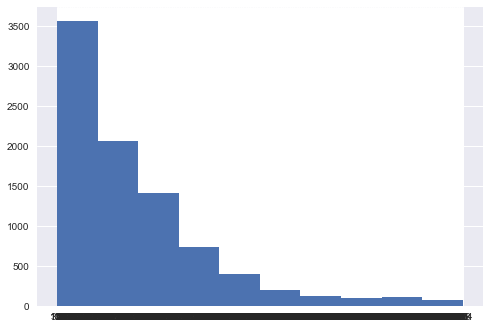

In [139]:
plt.hist(data['total_Op'])   

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


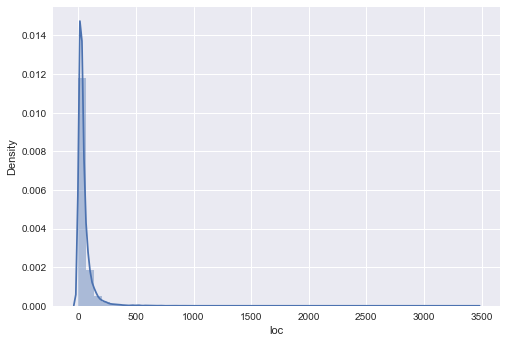

In [140]:
sns.distplot(data['loc'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loc'>

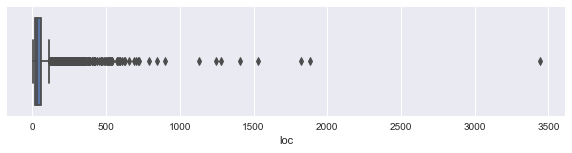

In [141]:
fig = plt.figure(figsize =(10, 2))
sns.boxplot(data['loc'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n'>

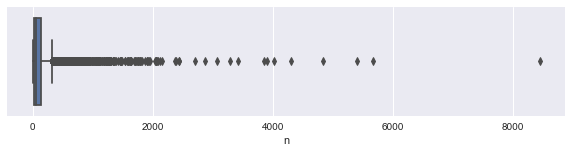

In [142]:
fig = plt.figure(figsize =(10, 2))
sns.boxplot(data['n'])

### Handling Outliers

In [ ]:
# before handling outliers in loc attribute in JM1 dataset

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loc'>

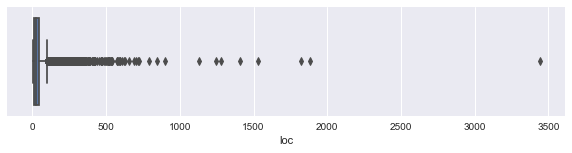

In [143]:
import seaborn as sns
fig = plt.figure(figsize =(10, 2))
sns.boxplot(jm1['loc'])

In [99]:
q1=np.percentile(jm1['loc'],25,interpolation="midpoint")
q3=np.percentile(jm1['loc'],75,interpolation="midpoint")
iqr=q3-q1

In [100]:
upper=jm1['loc']>=(q3+1.5*iqr)
print("upper bound:",upper)
print(np.where(upper))
lower=jm1['loc']<=(q1-1.5*iqr)
print("lower bound:",lower)
print(np.where(lower))

upper bound: 0        False
1        False
2        False
3         True
4        False
         ...  
10880    False
10881    False
10882    False
10883    False
10884    False
Name: loc, Length: 10885, dtype: bool
(array([    3,     9,    15,    17,    20,    22,    25,    27,    37,
          43,    48,    49,    50,    51,    54,    57,    58,    62,
          63,    73,    82,    85,    87,    88,    98,   102,   114,
         115,   119,   131,   135,   141,   146,   149,   156,   170,
         173,   190,   192,   198,   209,   225,   238,   246,   247,
         252,   255,   260,   264,   274,   275,   280,   281,   282,
         284,   285,   286,   289,   295,   296,   302,   306,   307,
         308,   309,   310,   311,   313,   314,   315,   316,   328,
         335,   356,   360,   379,   382,   383,   385,   398,   400,
         401,   435,   452,   457,   461,   462,   463,   464,   473,
         475,   500,   506,   512,   513,   523,   526,   527,   528,
         529,

In [101]:
column_name = jm1.columns


jm1.columns = column_name
jm1.head()
 
''' Detection '''
# IQR
Q1 = np.percentile(jm1['loc'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(jm1['loc'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", jm1.shape)
 
# Upper bound
upper = np.where(jm1['loc'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(jm1['loc'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
jm1.drop(upper[0], inplace = True)
jm1.drop(lower[0], inplace = True)
 
print("New Shape: ", jm1.shape)

Old Shape:  (10885, 22)
New Shape:  (9921, 22)


In [ ]:
# after handling the outliers  in loc attribute in JM1 dataset

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loc'>

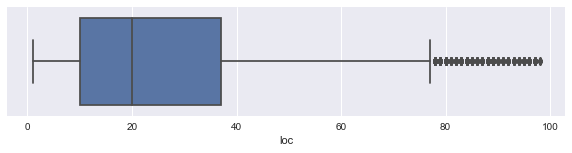

In [102]:
fig = plt.figure(figsize =(10, 2))
sns.boxplot(jm1['loc'])